**Submitted By:** **Huzaifa Inam 009 & M Waleed Raza 023**

**Submitted To:** **Mam Samia Kiran**

# **Computer Vision Project**




**Github Link:** https://github.com/Muhammadwaleed050/Computer-Vision.git

**Datset Link:** https://www.kaggle.com/datasets/msambare/fer2013?resource=download


# **EMOTIONS DETECTION USING CNN**




# **Install Dependencies and Setup**





In [ ]:
# Install dependencies
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

# Verify TensorFlow installation
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Set GPU memory growth to avoid OOM errors
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

print("GPUs available:", tf.config.list_physical_devices('GPU'))


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
TensorFlow version: 2.17.1
GPUs available: []


# **Unzip Dataset & Clean Dodgy Images**


In [ ]:
import os
import cv2
import imghdr
import zipfile

# Unzip data.zip
zip_path = '/content/data.zip'  # Update this path as needed
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

data_dir = '/content/data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']  # Valid image extensions

# Remove corrupted or invalid images
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # Ensure it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            if os.path.isfile(image_path):  # Ensure it's a file
                try:
                    img = cv2.imread(image_path)
                    ext = imghdr.what(image_path)
                    if ext not in image_exts:
                        print(f"Deleting invalid image: {image_path}")
                        os.remove(image_path)
                except Exception as e:
                    print(f"Error with image {image_path}: {e}")
                    os.remove(image_path)


# **Load and Prepare Dataset**



In [ ]:
import shutil

# Path to the directory you want to delete
dir_path = '/content/data'

# Delete the directory and all its contents
shutil.rmtree(dir_path)

In [ ]:
# Load dataset
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),
    batch_size=32,
    shuffle=True
)

# Split data into train, validation, and test sets
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = int(0.1 * len(data))

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

print(f"Train size: {train_size}, Val size: {val_size}, Test size: {test_size}")


Found 305 files belonging to 2 classes.
Train size: 7, Val size: 2, Test size: 1


# **Scale Data**

In [ ]:
# Scale data
train = train.map(lambda x, y: (x / 255.0, y))
val = val.map(lambda x, y: (x / 255.0, y))
test = test.map(lambda x, y: (x / 255.0, y))


# **Build the Deep Learning Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Define model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# **Train the Model**

In [ ]:
# Set up TensorBoard callback
logdir = '/content/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train model
hist = model.fit(
    train,
    epochs=20,
    validation_data=val,
    callbacks=[tensorboard_callback]
)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.4618 - loss: 0.7715 - val_accuracy: 0.4688 - val_loss: 0.6659
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.6888 - loss: 0.6421 - val_accuracy: 0.7344 - val_loss: 0.5416
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.7092 - loss: 0.5983 - val_accuracy: 0.8750 - val_loss: 0.5177
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8083 - loss: 0.5275 - val_accuracy: 0.8750 - val_loss: 0.3757
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8684 - loss: 0.3909 - val_accuracy: 0.9062 - val_loss: 0.2916
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8847 - loss: 0.3043 - val_accuracy: 0.8906 - val_loss: 0.3994
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8853 - loss: 0.3201 - val_accuracy: 0.8906 - val_loss: 0.3152
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9095 - loss: 0.2568 - val_accuracy: 0.8438 - val_loss: 0.2833
Epoch 9/

# **Plot Performance**

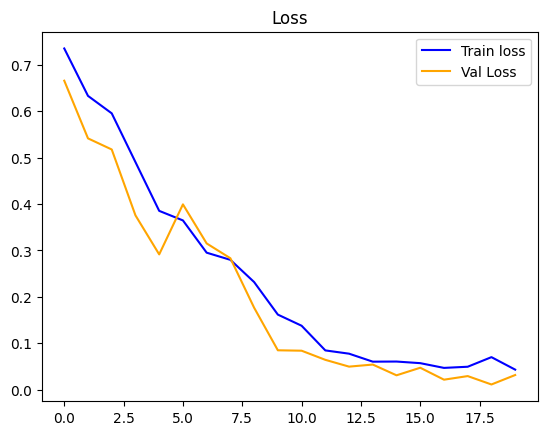

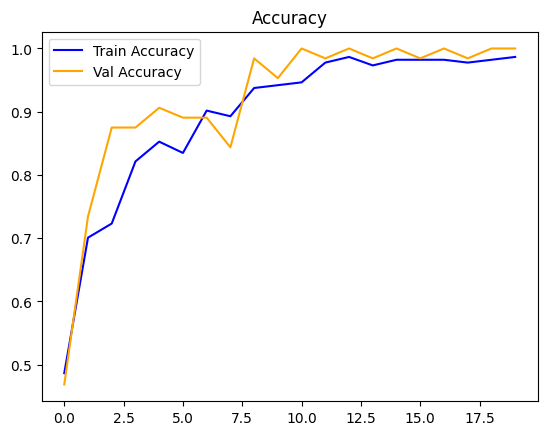

In [ ]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure()
plt.plot(hist.history['loss'], label='Train loss', color='blue')
plt.plot(hist.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure()
plt.plot(hist.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title('Accuracy')
plt.legend()
plt.show()


# **Evaluate the Model**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Initialize metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

# Evaluate on test set
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
Precision: 1.0, Recall: 1.0, Accuracy: 1.0


# **Test on a Any Image**

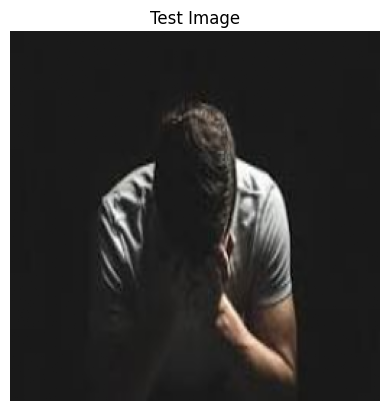

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction array: [[0.999244]]
Predicted class: Sad


In [ ]:
import cv2
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# Test image path
test_image_path = '/content/sad3.jfif'  # Replace with an actual image path

# Load and preprocess image
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
resize = tf.image.resize(img, (256, 256)) / 255.0  # Resize and normalize

# Plot the image
plt.imshow(resize.numpy())  # Plot the resized image
plt.title("Test Image")
plt.axis('off')
plt.show()

# Predict
yhat = model.predict(np.expand_dims(resize, axis=0))
print("Prediction array:", yhat)

# Display prediction result
if yhat > 0.5:
    print("Predicted class: Sad")
else:
    print("Predicted class: Happy")


**Neutral**

Found 4254 files belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.3727 - loss: 1.1455 - val_accuracy: 0.4075 - val_loss: 1.0832
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.4346 - loss: 1.0713 - val_accuracy: 0.4435 - val_loss: 1.0569
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.4594 - loss: 1.0470 - val_accuracy: 0.5000 - val_loss: 1.0297
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.4640 - loss: 1.0447 - val_accuracy: 0.5168 - val_loss: 0.9890
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.5302 - loss: 0.9750 - val_accuracy: 0.5132 - val_loss: 0.9675
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.5784 - loss: 0.9026 - val_accuracy: 0.5577 - val_loss: 0.9279
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.6287 - loss: 0.8312 - val_accuracy: 0.5601 - val_loss: 0.9447
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.6682 - loss: 0.7428 - val_accuracy: 0.5481 - v

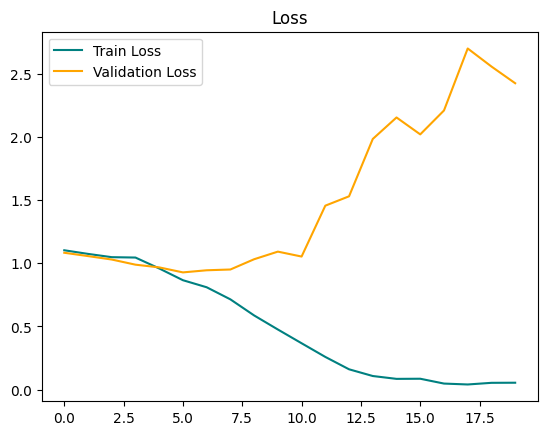

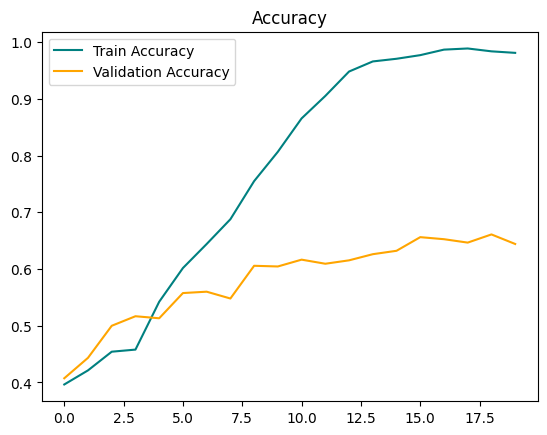

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


InvalidArgumentError: {{function_node __wrapped__LogicalAnd_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [1,32] vs. [1,96] [Op:LogicalAnd] name: 

In [4]:
import os
import cv2
import imghdr
import zipfile
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# 1. Unzip and Prepare Dataset
zip_path = '/content/data_emotions.zip'  # Update this path as needed
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

data_dir = '/content/data_emotions'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']  # Valid image extensions

# Remove corrupted or invalid images
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # Ensure it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            if os.path.isfile(image_path):  # Ensure it's a file
                try:
                    img = cv2.imread(image_path)
                    ext = imghdr.what(image_path)
                    if ext not in image_exts:
                        print(f"Deleting invalid image: {image_path}")
                        os.remove(image_path)
                except Exception as e:
                    print(f"Error with image {image_path}: {e}")
                    os.remove(image_path)

# 2. Load and Split Data
data = tf.keras.utils.image_dataset_from_directory(data_dir, label_mode='int')  # Automatically detects classes
data = data.map(lambda x, y: (x / 255.0, y))  # Normalize images

# Split into train, validation, and test datasets
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# 3. Build the Model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')  # Updated for 3 classes (Happy, Sad, Neutral)
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

# 4. Train the Model
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

# 5. Plot Performance
# Plot Loss
plt.figure()
plt.plot(hist.history['loss'], label='Train Loss', color='teal')
plt.plot(hist.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.figure()
plt.plot(hist.history['accuracy'], label='Train Accuracy', color='teal')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy')
plt.legend()
plt.show()

# 6. Evaluate the Model
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

precision = Precision()
recall = Recall()
accuracy = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

print(f"Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}")

# 7. Test with a Single Image
test_image_path = '/content/data_emotions/neutral/PrivateTest_10086748.jpg'  # Replace with an actual image path

# Load and preprocess the test image
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256, 256)) / 255.0

# Plot the image
plt.imshow(resize.numpy())
plt.title("Test Image")
plt.axis('off')
plt.show()

# Predict
yhat = model.predict(np.expand_dims(resize, axis=0))
print("Prediction array:", yhat)

# Display prediction result
predicted_class = tf.argmax(yhat, axis=1).numpy()[0]
if predicted_class == 0:
    print("Predicted class: Happy")
elif predicted_class == 1:
    print("Predicted class: Sad")
else:
    print("Predicted class: Neutral")

# 8. Save the Model
model.save('/content/imageclassifier.h5')
new_model = tf.keras.models.load_model('/content/imageclassifier.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
Precision: 0.7368420958518982
Recall: 0.806584358215332
Accuracy: 0.1538461595773697


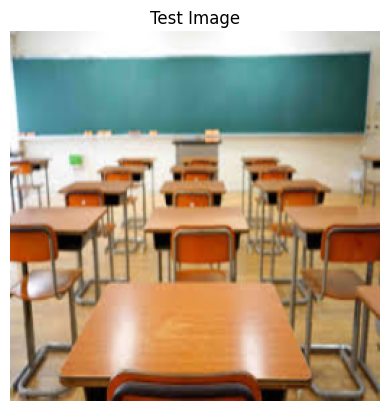

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Prediction array: [[3.6868447e-12 1.0000000e+00 3.2273000e-23]]
Predicted class: Sad


In [11]:
# 6. Evaluate the Model
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

precision = Precision()
recall = Recall()
accuracy = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)  # Predicted probabilities
    yhat_classes = tf.argmax(yhat, axis=1)  # Convert probabilities to class predictions
    precision.update_state(y, yhat_classes)
    recall.update_state(y, yhat_classes)
    accuracy.update_state(y, yhat_classes)

print(f"Precision: {precision.result().numpy()}")
print(f"Recall: {recall.result().numpy()}")
print(f"Accuracy: {accuracy.result().numpy()}")


# 7. Test with a Single Image
test_image_path = '/content/neutral1.jpeg'  # Replace with an actual image path

# Load and preprocess the test image
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256, 256)) / 255.0

# Plot the image
plt.imshow(resize.numpy())
plt.title("Test Image")
plt.axis('off')
plt.show()

# Predict
yhat = model.predict(np.expand_dims(resize, axis=0))
print("Prediction array:", yhat)

# Display prediction result
predicted_class = tf.argmax(yhat, axis=1).numpy()[0]
if predicted_class == 0:
    print("Predicted class: Happy")
elif predicted_class == 1:
    print("Predicted class: Sad")
else:
    print("Predicted class: Neutral")

# 8. Save the Model
model.save('/content/imageclassifier.h5')
new_model = tf.keras.models.load_model('/content/imageclassifier.h5')